# Домашнее задание №2
## Кисляков Данил 797

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

### Задача 1
_(К теоретической задаче 3.1)_ Сгенерируйте выборки $X_1, \ldots, X_N$ из всех распределений из задачи 3.1 $(N = 1000).$ Для всех $n \leq N$ посчитайте значения полученных оценок (по выборке $X_1, \ldots X_n$) методом моментов. Оцените дисперсию каждой оценки, сгенерировав для каждой из них $K = 1000$ бутстрепных выборок а) с помощью параметрического бутстрепа, б) с помощью непараметрического бутстрепа. Проведите эксперимент для разных значений параметров распределений (рассмотрите не менее трех различных значений).

_Распределения из задчаи 3.1: a) $\mathcal{N}(a, \sigma^2),$ б) $\Gamma(\alpha, \lambda),$ в) $R(a, b),$ г) $Pois(\lambda),$ д) $Bin(m, p),$ е) $Geom(p),$ ж) $Beta(\lambda_1, \lambda_2)$, з) $Pareto(\gamma, 1)$ и) $Cauchy(\theta).$_

Определим три функции: для построения графиков зависимости дисперсий оценки, посчитаных параметрическим и непараметрическим бутстрепом от размера выборки; и две функции для получения массива дисперсий параметрическим и непараметрическим бутстрепом соответственно

In [2]:
def plot_var(distr_name, par_name, var_p, var_np):
    plt.figure(figsize = (10, 5))
    plt.plot(var_p, label = "Параметрический бутстреп")
    plt.plot(var_np, label = "Непараметрический бутстреп")
    plt.legend(fontsize=12)
    plt.title("Дисперсия оценки параметра {} распределения {}".format(par_name, distr_name), fontsize=13)
    plt.xlabel("Размер выборки $n$", fontsize = 12)
    plt.ylabel("Дисперсия оценки {}".format(par_name), fontsize = 12)
    start = int(np.size(var_p) * 0.1)
    upper_bound = np.fmax(np.max(var_p[start:]), np.max(var_np[start:])) * 1.2
    lower_bound = np.fmin(np.min(var_p[start:]), np.min(var_np[start:])) * 0.2
    plt.ylim(lower_bound, upper_bound)

In [3]:
def np_bootstrap_var(X, K, *estimators):
    N = np.size(X)
    theta_var = np.empty((len(estimators), N))
    for n in range(N):
        X_bootstrap = np.random.choice(X[:n+1], (K, N))
        for i in range(np.shape(theta_var)[0]):
            theta_var[i][n] = np.var(estimators[i](X_bootstrap))
    return (tuple(theta_var))

In [4]:
def par_bootstrap_var(X, K, distr, *estimators, start = 1):
    N = np.size(X)
    theta_dim = len(estimators)
    theta_hat = np.empty((theta_dim, N + 1 - start))
    for i in range(theta_dim):
        theta_hat[i] = np.array([estimators[i](X[:n]) for n in range(start, N + 1)])
    theta_var = np.empty((theta_dim, N + 1 - start))
    for n in range(N + 1 - start):
        X_bootstrap = distr(theta_hat.T[n]).rvs(size = (K, N))
        theta_bootstrap = np.array([])
        for i in range(theta_dim):
            theta_bootstrap = estimators[i](X_bootstrap)
            theta_var[i][n] = np.var(theta_bootstrap)
    return (tuple(theta_var))

Далее для каждого распределения будет выделено по два блока: функции, считающие соответствующую оценку по методу моментов и построение графиков дисперсий оценок, посчитанных двумя способами

Оценки нормального распределения:
$$
    \hat{a} = \overline{X}, \; \hat{\sigma}^2 = \overline{X^2} - \overline{X}^2 = s^2
$$

In [7]:
def mean(x):
    if len(np.shape(x)) == 1:
        return np.mean(x)
    else:
        return np.mean(x, axis = 1)
    
def var(x):
    if len(np.shape(x)) == 1:
        return np.sqrt(np.var(x))
    else:
        return np.var(x, axis = 1)


In [ ]:
parameters = [(0,1), (1,10), (7,2)]
N = K = 10**3
norm_distr = lambda x : sps.norm(loc = x[0], scale = x[1])
for p in parameters:
    X = sps.norm(p[0], p[1]).rvs(N)
    a_pvar, sigma_pvar = par_bootstrap_var(X, K, norm_distr, mean, var)
    a_npvar, sigma_npvar = np_bootstrap_var(X, K, mean, var)
    plot_var("$\mathcal{N}" + str(p) + "$", "$a$", a_pvar, a_npvar)
    plot_var("$\mathcal{N}" + str(p) + "$", "$\sigma^2$", sigma_pvar, sigma_npvar)

Обратим внимание, что чем больше истинное значение дисперсии нормального распределения, тем больше дисперсии оценок.

Оценки гамма-распределения:
$$
    \hat{\alpha} = \frac{\overline{X}^2}{s^2}, \; \hat{\lambda} = \frac{\overline{X}}{s^2}
$$
Заметим, что мы не можем найти оценку параметра по выборке из одного элемента, так как в таком случае выборочная дисперсия будет равна нулю, поэтому мы считаем оценки для всех срезок начиная с $n = 2.$

In [40]:
def alpha_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x)**2 / np.var(x)
    else:
        return np.mean(x, axis = 1)**2 / np.var(x, axis = 1)
    
def lambda_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x) / np.var(x)
    else:
        return np.mean(x, axis = 1) / np.var(x, axis = 1)


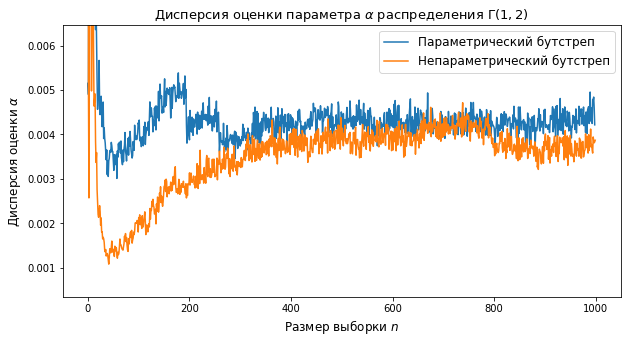

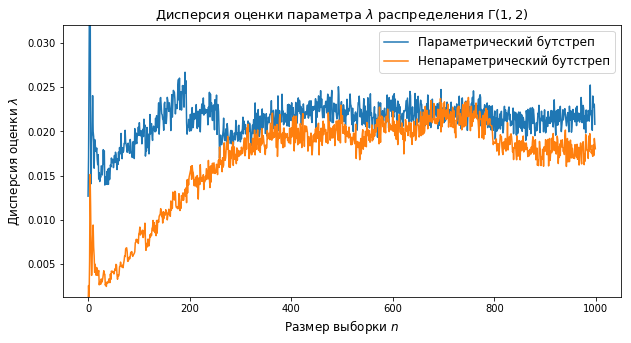

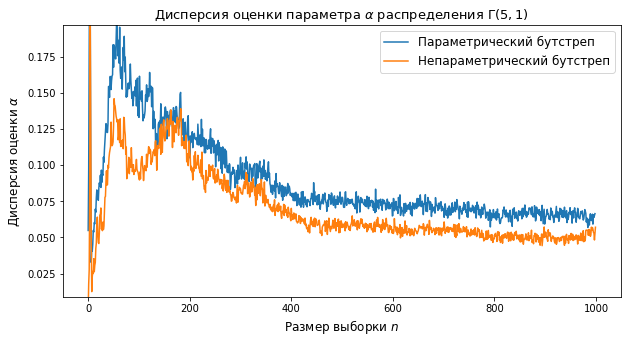

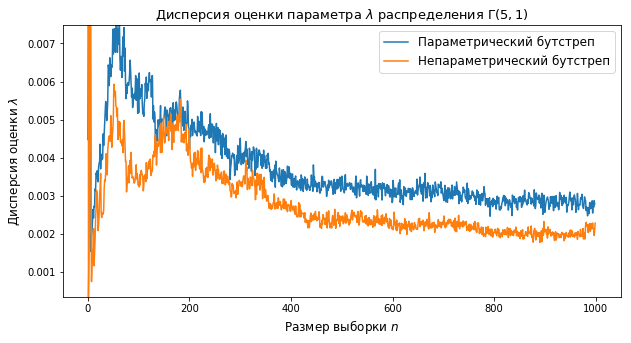

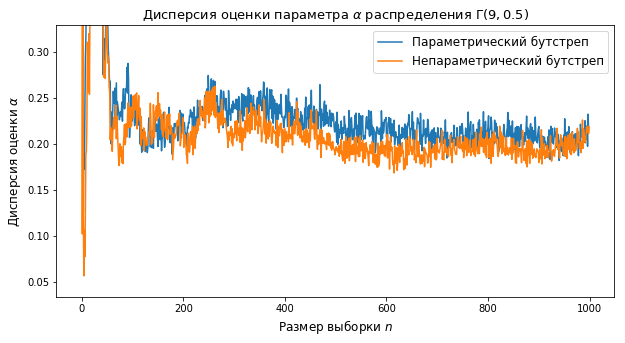

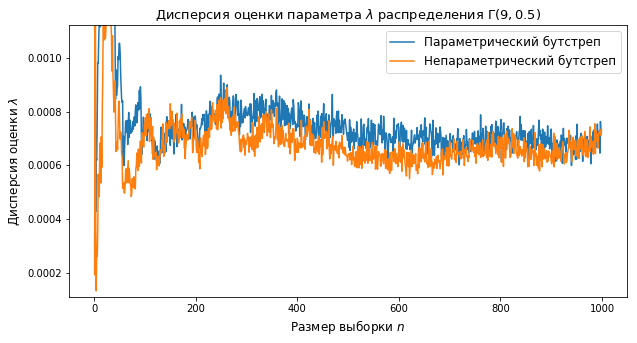

In [42]:
parameters = [(1,2), (5,1), (9,0.5)]
N = K = 10**3
gamma_distr = lambda x : sps.gamma(x[0], scale = 1.0 / x[1])
for p in parameters:
    X = sps.gamma(p[0], scale = 1.0 / p[1]).rvs(N)
    alpha_pvar, lambda_pvar = par_bootstrap_var(X, K, gamma_distr, alpha_est, lambda_est, start = 2)
    alpha_npvar, lambda_npvar = np_bootstrap_var(X, K, alpha_est, lambda_est)
    plot_var(r'$\Gamma' + str(p) + "$", r'$\alpha$', alpha_pvar, alpha_npvar)
    plot_var(r'$\Gamma' + str(p) + "$", r'$\lambda$', lambda_pvar, lambda_npvar)

Судя по графикам, дисперсия оценки $\alpha$ растёт вместе с самим параметром, но не линейно. Аналогичный вывод можно сделать и про дисперсию параметра $\lambda.$

Оценки равномерного распределения:
$$
    \hat{a} = \overline{X} - \sqrt{3s^2}, \; \hat{b} = \overline{X} + \sqrt{3s^2}
$$

In [43]:
def a_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x) - np.sqrt(3 * np.var(x))
    else:
        return np.mean(x, axis = 1) - np.sqrt(3 * np.var(x, axis = 1))
    
def b_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x) + np.sqrt(3 * np.var(x))
    else:
        return np.mean(x, axis = 1) + np.sqrt(3 * np.var(x, axis = 1))


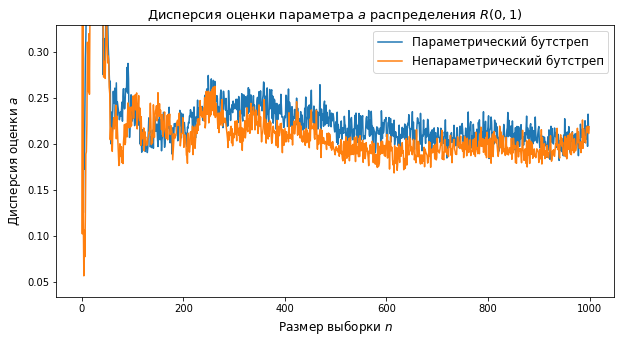

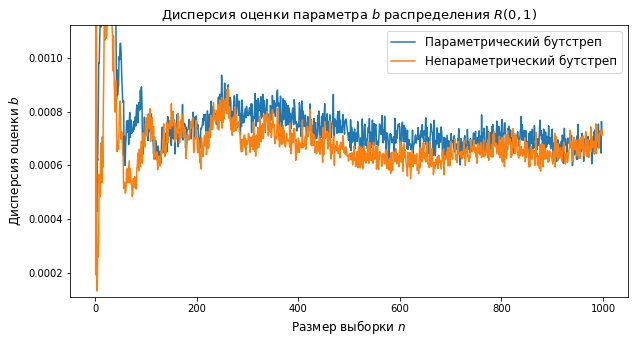

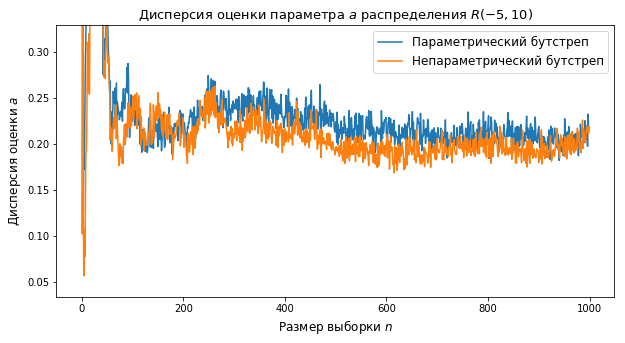

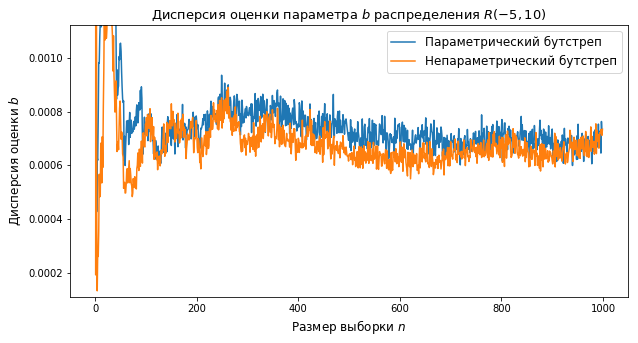

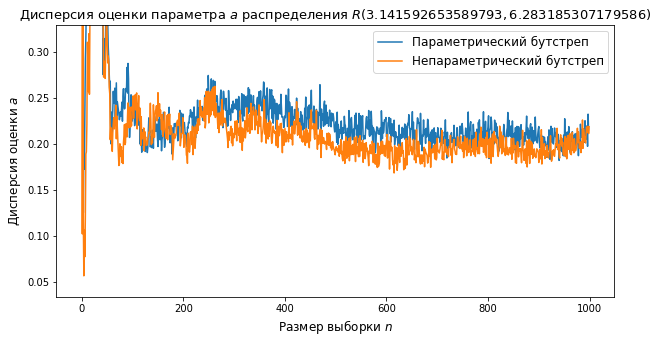

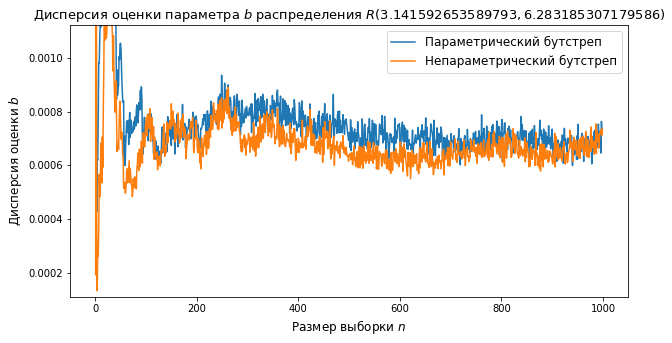

In [44]:
parameters = [(0,1), (-5,10), (np.pi, 2*np.pi)]
N = K = 10**3
uni_distr = lambda x : sps.uniform(loc = x[0], scale = x[1] - x[0])
for p in parameters:
    X = sps.uniform(loc = p[0], scale = p[1] - p[0]).rvs(N)
    a_pvar, b_pvar = par_bootstrap_var(X, K, uni_distr, a_est, b_est)
    a_npvar, b_npvar = np_bootstrap_var(X, K, a_est, b_est)
    plot_var(r'$R' + str(p) + "$", r'$a$', alpha_pvar, alpha_npvar)
    plot_var(r'$R' + str(p) + "$", r'$b$', lambda_pvar, lambda_npvar)

Несмотря на то, что оценки параметров, казалось бы, симметричны друг другу, дисперсия оценки правого края равномерного распределения гораздо меньше дисперсии оценки левого края.

Оценка для распределения Пуассона:
$$
    \hat{\lambda} = \overline{X}
$$

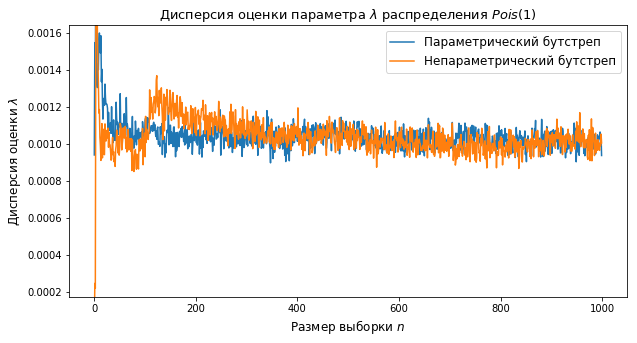

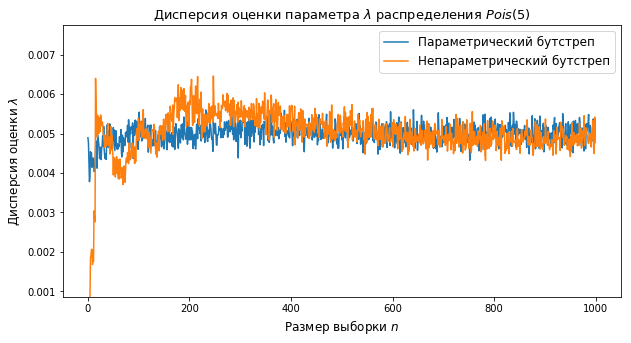

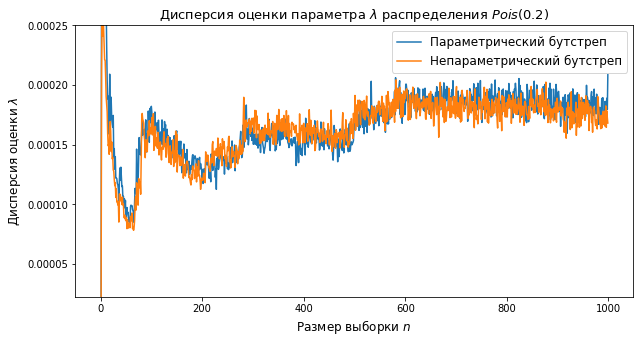

In [6]:
parameters = [1, 5, 0.2]
N = K = 10**3
pois_distr = lambda x : sps.poisson(x[0])
for p in parameters:
    X = sps.poisson(p).rvs(N)
    # [0] as bootstrap_var returns tuple
    lambda_pvar = par_bootstrap_var(X, K, pois_distr, mean)[0]
    lambda_npvar = np_bootstrap_var(X, K, mean)[0]
    plot_var(r'$Pois(' + str(p) + ")$", r'$\lambda$', lambda_pvar, lambda_npvar)

Отметим, что для распределения Пуассона дисперсии оценок, посчитанные двумя методами сходятся примерно к одному и тому же - к $0.001\lambda,$ где $\lambda$ - истинное значение параметра.

Статистики для биномиального распределения:
$$
    \hat{m} = \frac{\overline{X}^2}{\overline{X} - s^2}, \; \hat{p} = 1 - \frac{s^2}{\overline{X}}
$$
Отметим, что данные статистики корректно оценивают параметры только при больших значениях выборки, либо при больших истинных значениях самого параметра $(m > 10$ и $p > 0.2),$ в противном случае сгенерировать параметрическую бутстрепные выборки для всех срезок начальной выборки не удастся

In [62]:
def p_est(x):
    if len(np.shape(x)) == 1:
        return 1 - np.var(x) / np.mean(x)
    else:
        return np.ones(np.shape(x)[0]) - np.var(x, axis = 1) / np.mean(x, axis = 1)
    
def m_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x)**2 / (np.mean(x) - np.var(x))
    else:
        return np.mean(x, axis = 1)**2 / (np.mean(x, axis = 1) - np.var(x, axis = 1))

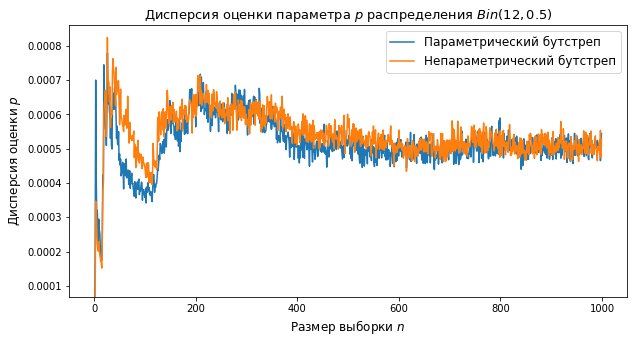

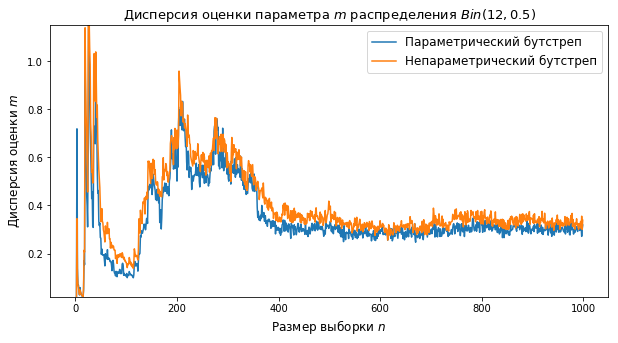

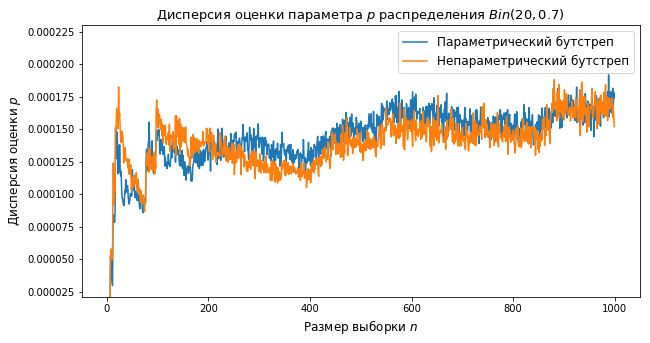

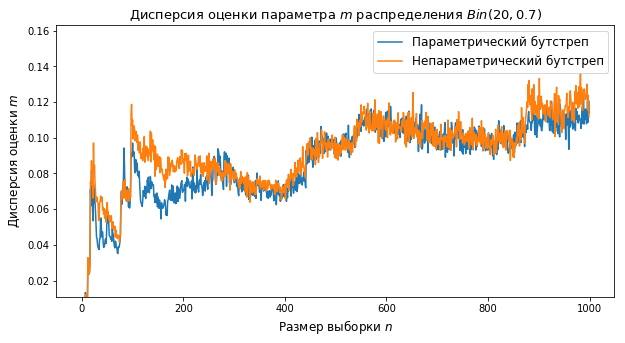

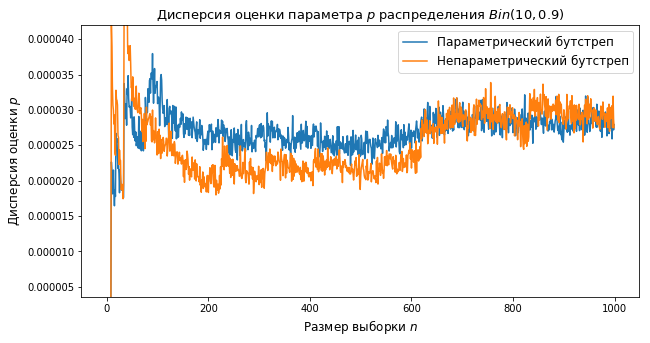

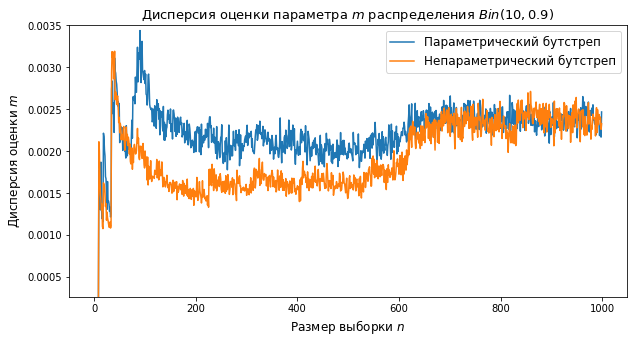

In [64]:
parameters = [(12, 0.5), (20, 0.7), (10, 0.9)]
N = K = 10**3
bin_distr = lambda x : sps.binom(int(x[0]), x[1])
for p in parameters:
    X = sps.binom(p[0], p[1]).rvs(N)
    m_pvar, p_pvar = par_bootstrap_var(X, K, bin_distr, m_est, p_est)
    m_npvar, p_npvar = np_bootstrap_var(X, K, m_est, p_est)
    plot_var(r'$Bin' + str(p) + "$", r'$p$', p_pvar, p_npvar)
    plot_var(r'$Bin' + str(p) + "$", r'$m$', m_pvar, m_npvar)

Обратим внимание, что с ростом параметра $p$ значение дисперсии оценки этого параметра уменьшается. Для параметра $m$ никаких корреляций, кроме описанных выше замечено не было.

Оценка для параметра геометрического распределения:
$$
    \hat{p} = \frac{1}{\overline{X}}
$$

In [67]:
def geom_est(x):
    if len(np.shape(x)) == 1:
        return 1.0 / np.mean(x)
    else:
        return np.ones(np.shape(x)[0]) / np.mean(x, axis = 1)


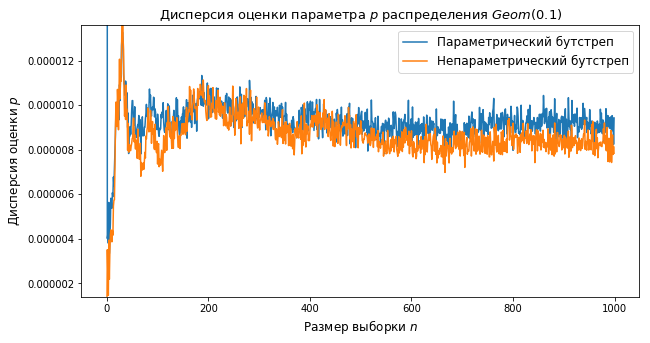

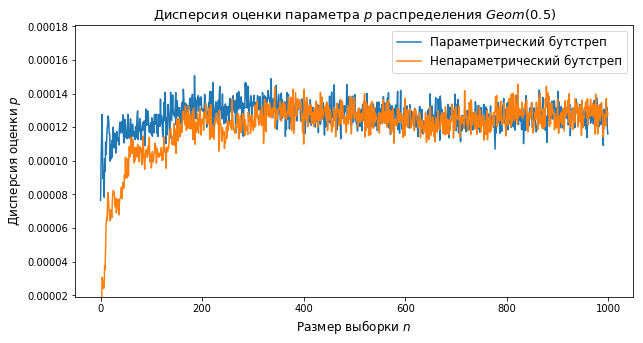

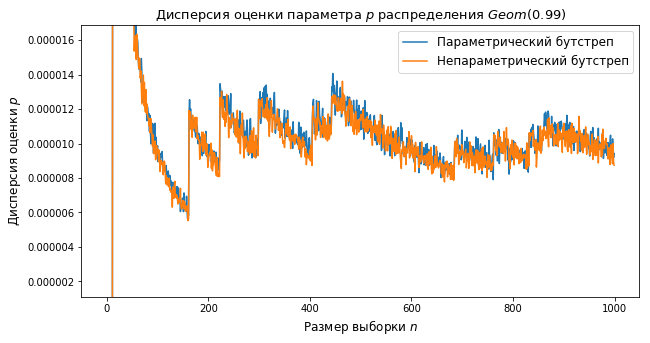

In [68]:
parameters = [0.1, 0.5, 0.99]
N = K = 10**3
geom_distr = lambda x : sps.geom(x[0])
for p in parameters:
    X = sps.geom(p).rvs(N)
    p_pvar = par_bootstrap_var(X, K, geom_distr, geom_est)[0]
    p_npvar = np_bootstrap_var(X, K, geom_est)[0]
    plot_var(r'$Geom(' + str(p) + ")$", r'$p$', p_pvar, p_npvar)

Заметно, что дисперсия оценки тем меньше, чем ближе значение параметра $p$ к одному из крайних значений - $0$ или $1.$

Оценки параметров для бета-распределения:
$$
    \hat{\lambda_1} = \frac{\overline{X}(\overline{X} - \overline{X^2})}{s^2}, \; 
    \hat{\lambda_2} = (\overline{X} - 1)\frac{\overline{X^2} - \overline{X}}{s^2}
$$

In [73]:
def beta_first_est(x):
    if len(np.shape(x)) == 1:
        return np.mean(x) * (np.mean(x) - np.mean(x**2)) / np.var(x)
    else:
        return np.mean(x, axis = 1) * (np.mean(x, axis = 1) - np.mean(x**2, axis = 1)) / np.var(x, axis = 1)
    
def beta_second_est(x):
    if len(np.shape(x)) == 1:
        return (np.mean(x**2) - np.mean(x)) * (np.mean(x) - 1) / np.var(x)
    else:
        return (np.mean(x**2, axis = 1) - np.mean(x, axis = 1)) * \
        (np.mean(x, axis = 1) - 1) / np.var(x, axis = 1)


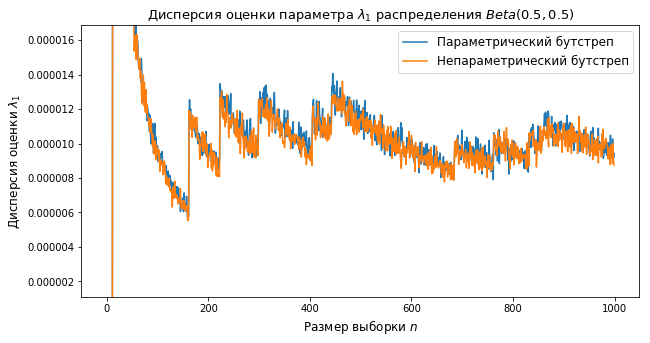

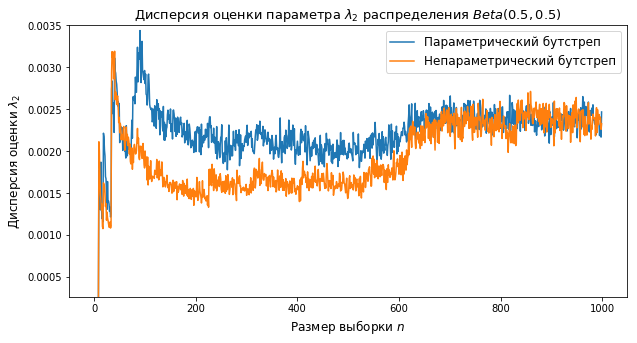

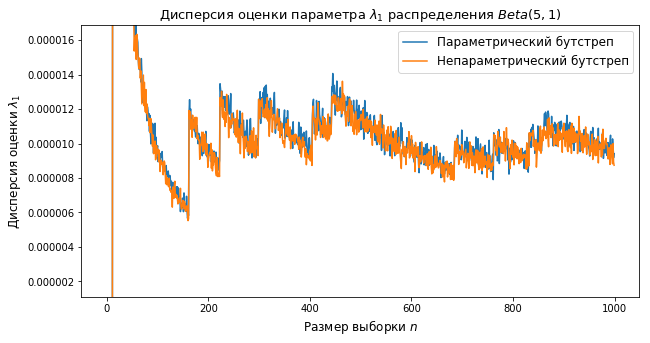

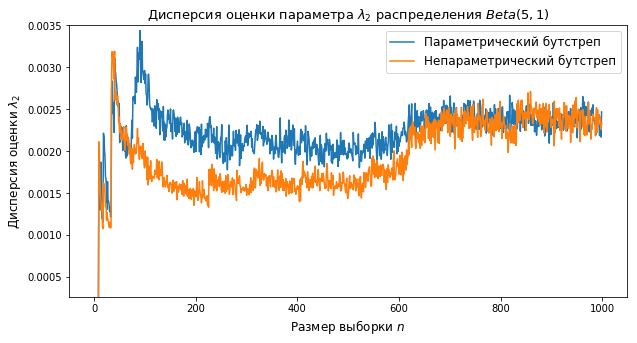

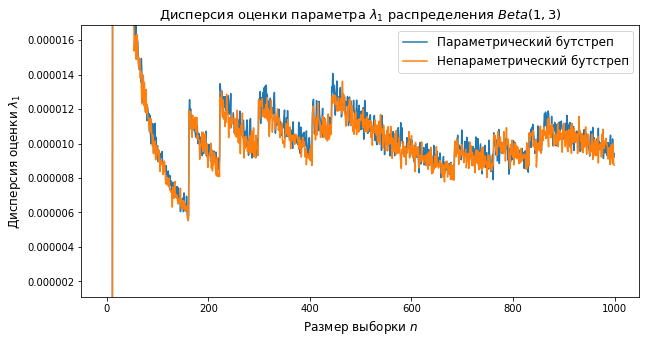

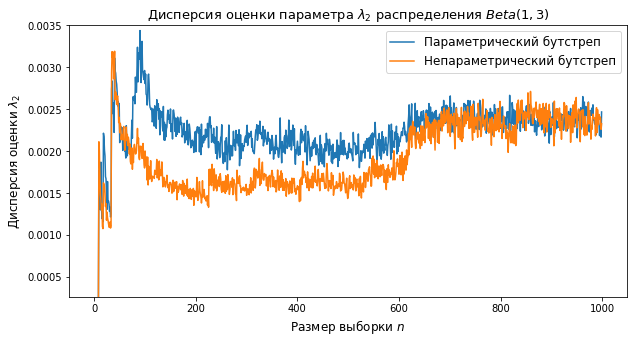

In [75]:
parameters = [(0.5, 0.5), (5, 1), (1, 3)]
N = K = 10**3
beta_distr = lambda x : sps.beta(x[0], x[1])
for p in parameters:
    X = sps.beta(p[0], p[1]).rvs(N)
    first_pvar, second_pvar = par_bootstrap_var(X, K, beta_distr, beta_first_est, beta_second_est, start = 2)
    first_npvar, second_npvar = np_bootstrap_var(X, K, beta_first_est, beta_second_est)
    plot_var(r'$Beta' + str(p) + "$", r'$\lambda_1$', p_pvar, p_npvar)
    plot_var(r'$Beta' + str(p) + "$", r'$\lambda_2$', m_pvar, m_npvar)

Обратим внимание, что дисперсии параметров сходятся примерно к одной и той же паре значений, независимо от истинных параметров распределения.

Оценка для параметра распределения Парето:
$$
    \hat{\gamma} = \frac{1}{\overline{\ln X}}
$$

In [84]:
def pareto_est(x):
    if len(np.shape(x)) == 1:
        return 1 / np.mean(np.log(x))
    else:
        return np.ones(np.shape(x)[0]) / np.mean(np.log(x), axis = 1)


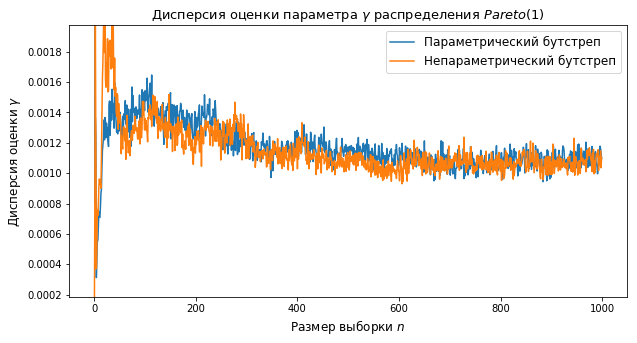

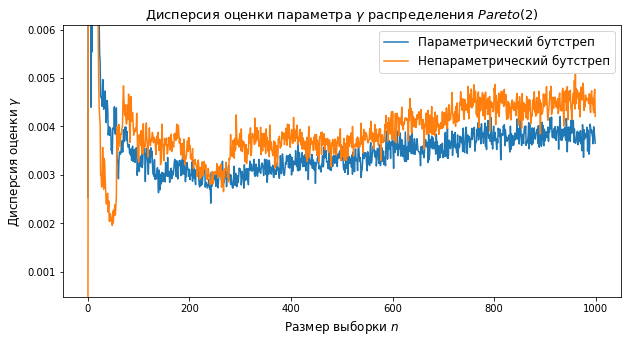

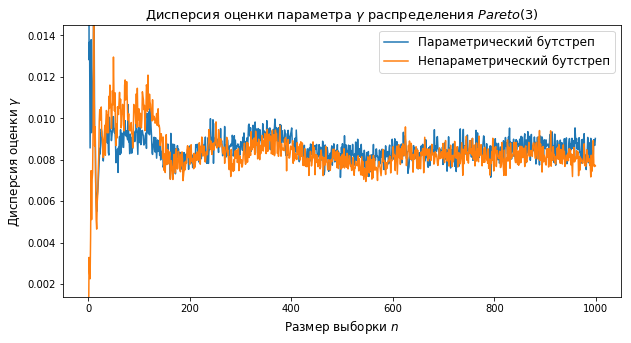

In [85]:
parameters = [1, 2, 3]
N = K = 10**3
pareto_distr = lambda x : sps.pareto(x[0])
for p in parameters:
    X = sps.pareto(p).rvs(N)
    p_pvar = par_bootstrap_var(X, K, pareto_distr, pareto_est)[0]
    p_npvar = np_bootstrap_var(X, K, pareto_est)[0]
    plot_var(r'$Pareto(' + str(p) + ")$", r'$\gamma$', p_pvar, p_npvar)

Кажется, что дисперсия оценок примерно порядка $\gamma^2 \cdot 10^{-3},$ где $\gamma$ - истинное значение параметра

Оценка параметра для распределения Коши:
$$
    \hat{\theta} = \frac{1}{tg(\pi P_n^*[0, 1])}
$$
_Код ниже не работает, так как неизменно встречается с делением на ноль, несмотря на то, что я пытаюсь всеми способами этого избежать_

In [47]:
def cauchy_est(x):
    if len(np.shape(x)) == 1:
        if (np.sum(1 for i in x if i >= 0 and i <= 1) == 0):
            print(x)
        return 1.0 / np.tan(np.pi * np.sum(1 for i in x if i >= 0 and i <= 1) / np.size(x))
    else:
        return np.ones(np.shape(x)[0]) / np.tan(np.pi * 
            np.array([np.sum(1 for i in a if i >= 0 and i <= 1) / np.size(a) for a in x]))
    

In [ ]:
parameters = [0.5, 1, 2]
N = K = 10**3
cauchy_distr = lambda x : sps.cauchy(scale = x[0])
for p in parameters:
    X = sps.cauchy(p).rvs(N)
    first = np.intersect1d(np.where(X >= 0)[0], np.where(X <= 1)[0])[0]
    theta_hat = np.array([cauchy_est(X[:n]) for n in range(first+1, N+1)])
    bad_est = np.where(theta_hat <= 0)[0]
    first = bad_est[-1] + 1 if len(bad_est) > 0 else first
    theta_pvar = par_bootstrap_var(X, K, cauchy_distr, cauchy_est, start = first + 1)[0]
    theta_npvar = np_bootstrap_var(X, K, cauchy_est)[0]
    plot_var(r'$Cauchy(' + str(p) + ")$", r'$\theta$', theta_pvar, theta_npvar)

#### Вывод:
Сравнивая графики дисперсий оценок для множества разных распределений, полученных методами параметрического и непараметрического бутстрепа мы видим, что с увеличением размера выборки дисперсии, полученные разными методами сходятся примерно к одному и тому же числу.

### Задача 2
На высоте 1 метр от поверхности Земли закреплено устройство, которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ - перпендикуляр к поверхности Земли, опущенный из точки, в которой закреплено устройство. Угол к прямой $l$ (под которым происходит излучение) устройство выбирает случайно из равномерного распределения на отрезке $(-\pi/2, \pi/2)$ (все выборы осуществляются независимо). В этих предположениях точки пересечения с поверхностью имеют распределение Коши с плотностью $p(x) = \frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$ соответствует проекции точки расположения устройства на поверхность Земли (направление оси и начало координат на поверхности Земли выбраны заранее некоторым образом независимо от расположения устройства). В файле Cauchy.csv находятся координаты точек пересечения лучей с поверхностью Земли. Оцените параметр сдвига методом максимального правдоподобия a) по половине выборки (первые 500 элементов выборки, т.е. выборка состоит из 1000 наблюдений); б) по всей выборке. Оценку произведите по сетке (т.е. возьмите набор точек с некоторым шагом и верните ту, на которой достигается максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Если получается долго или не хватает памяти, то уменьшите интервал поиска и поясните (в комментариях), почему берете именно такой интервал.

Функция правдоподобия для распределения Коши со сдвигом:
$$
    f(x) = \prod\limits_{i = 1}^n \frac{1}{\pi (1 + (x_i - x_0)^2)} = \frac{1}{\pi^n} = 
    \prod\limits_{i = 1}^n \frac{1}{\pi (1 + (x_i - x_0)^2)}
$$
$$
    L(x) = \ln f(x) = -n\ln \pi - \sum\limits_{i = 1}^n \ln (1 + (x_i - x_0)^2)
$$

In [50]:
import csv

In [51]:
def f_likelyhood(x):
    N = np.size(x)
    def f_sample_ll(x0):
        return -N * np.pi - np.sum(np.log(1 + (x - x0)**2))
    return f_sample_ll

Оценка методом максимального правдоподобия на первых 500 элементах выборки составляет 662.04
Оценка методом максимального правдоподобия на 1000 элементах выборки составляет 662.05


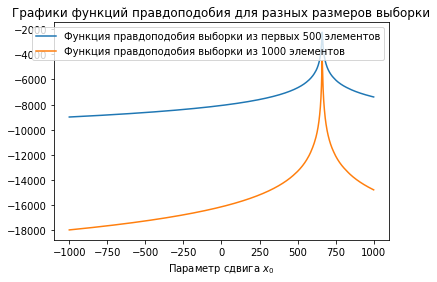

In [58]:
file_path = "Cauchy.csv"
X = np.array([])
with open(file_path, "r") as f:
    reader = csv.reader(f)
    X = np.array([float(i[0]) for i in reader])
domain = np.linspace(-1000, 1000, int(2000 / 0.01) + 1) # step = 0.01
f_ll = f_likelyhood(X[:500])
shift_mle_half = domain[np.argmax(np.array([f_ll(t) for t in domain]))]
plt.figure()
plt.plot(domain, [f_ll(t) for t in domain], label="500 элементов")
f_ll = f_likelyhood(X)
plt.plot(domain, [f_ll(t) for t in domain], label="1000 элементов")
plt.title("Графики функций правдоподобия для разных размеров выборки")
plt.xlabel("Параметр сдвига $x_0$")
plt.legend()
shift_mle = -1000 + 0.01*np.argmax(np.array([f_ll(t) for t in domain]))
print("Оценка методом максимального правдоподобия на первых 500 элементах выборки составляет {}".format(shift_mle_half))
print("Оценка методом максимального правдоподобия на 1000 элементах выборки составляет {}".format(shift_mle))